In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
Spatial_hand = pd.read_csv('/Users/emilkoch/Downloads/export-4.csv')


TypeError: 'str' object is not callable

In [3]:
# Replace infinite values with NaN, then fill NaN with 0
Spatial_hand = Spatial_hand.replace([np.inf, -np.inf], np.nan).fillna(0)

In [4]:
Spatial_hand

,MajorLocation_2_0,MinorLocation_2_0,SecondMinorLocation_2_0,SignType_2_0,LexicalClass,CDISemanticCategory,SignBankEnglishTranslations,distance_major_minor,distance_minor_second_minor,angle
0,4,23,24,3,4,11,1329,26.870058,1.414214,3.141592653589793
1,2,26,24,1,4,17,1634,33.941125,2.828427,0
2,4,23,24,4,4,6,656,26.870058,1.414214,3.141592653589793
3,3,17,24,3,4,0,1631,19.798990,9.899495,3.141592653589793
4,4,23,24,4,4,0,723,26.870058,1.414214,3.141592653589793
...,...,...,...,...,...,...,...,...,...,...
2695,3,2,2,3,4,0,700,1.414214,0.000000,[NULL]
2696,4,23,24,4,4,0,700,26.870058,1.414214,3.141592653589793
2697,2,7,17,0,6,0,700,7.071068,14.142136,3.141592653589793
2698,0,0,0,3,4,0,700,0.000000,0.000000,[NULL]


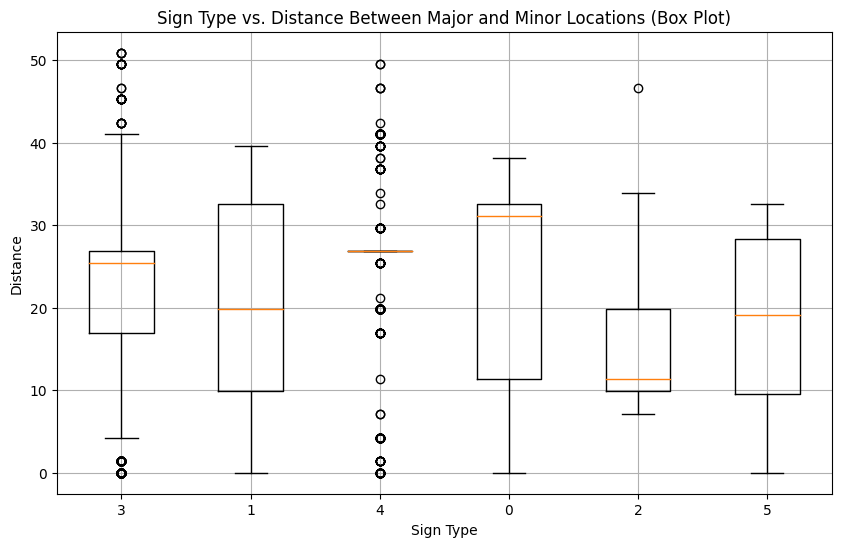

In [5]:
plt.figure(figsize=(10, 6))
plt.boxplot([Spatial_hand[Spatial_hand['SignType_2_0'] == i]['distance_major_minor'] for i in Spatial_hand['SignType_2_0'].unique()], labels=Spatial_hand['SignType_2_0'].unique())
plt.title('Sign Type vs. Distance Between Major and Minor Locations (Box Plot)')
plt.xlabel('Sign Type')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [6]:
correlation = Spatial_hand['SignType_2_0'].corr(Spatial_hand['distance_major_minor'])
print("Correlation between Sign Type and Distance:", correlation)


Correlation between Sign Type and Distance: 0.05334577211140373


/var/folders/4r/5qs7726s3_dc54vtgh1sc2740000gn/T/ipykernel_52321/404962805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Spatial_hand.corr()


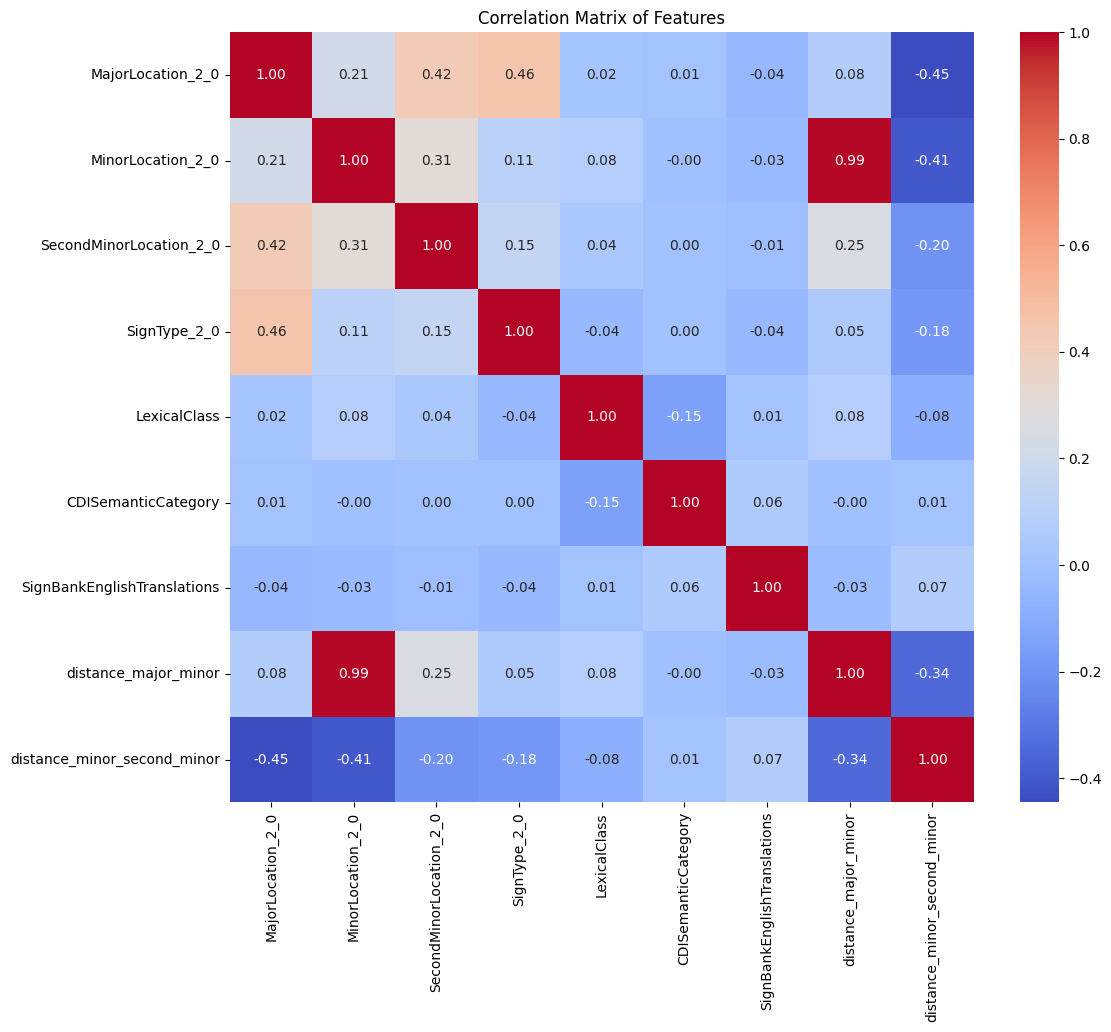

In [8]:
# Compute the correlation matrix
corr_matrix = Spatial_hand.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Extract correlations with lexical class and sign type excluding themselves
lexical_class_corr = corr_matrix['LexicalClass'].drop(['LexicalClass', 'SignType_2_0']).sort_values(ascending=False)
sign_type_corr = corr_matrix['SignType_2_0'].drop(['SignType_2_0', 'LexicalClass']).sort_values(ascending=False)

# Print the top correlated features
print("Top features correlated with Lexical Class:")
print(lexical_class_corr.head())

print("\nTop features correlated with Sign Type:")
print(sign_type_corr.head())


Top features correlated with Lexical Class:
MinorLocation_2_0              0.083624
distance_major_minor           0.080872
SecondMinorLocation_2_0        0.044291
MajorLocation_2_0              0.023177
SignBankEnglishTranslations    0.008463
Name: LexicalClass, dtype: float64

Top features correlated with Sign Type:
MajorLocation_2_0          0.460999
SecondMinorLocation_2_0    0.150977
MinorLocation_2_0          0.111428
distance_major_minor       0.053346
CDISemanticCategory        0.004785
Name: SignType_2_0, dtype: float64


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X = Spatial_hand[['MinorLocation_2_0', 'distance_major_minor', 'SecondMinorLocation_2_0', 'MajorLocation_2_0']]
y = Spatial_hand['LexicalClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming LexicalClass has 7 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


2024-03-10 14:15:58.456107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
54/54 [==============================] - 3s 18ms/step - loss: 1.6078 - accuracy: 0.3709 - val_loss: 1.3771 - val_accuracy: 0.4537
Epoch 2/50
54/54 [==============================] - 0s 7ms/step - loss: 1.4005 - accuracy: 0.4387 - val_loss: 1.3363 - val_accuracy: 0.4537
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3747 - accuracy: 0.4398 - val_loss: 1.3218 - val_accuracy: 0.4537
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3552 - accuracy: 0.4468 - val_loss: 1.3176 - val_accuracy: 0.4537
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 1.3458 - accuracy: 0.4549 - val_loss: 1.3150 - val_accuracy: 0.4537
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 1.3375 - accuracy: 0.4641 - val_loss: 1.3098 - val_accuracy: 0.4537
Epoch 7/50
54/54 [==============================] - 0s 6ms/step - loss: 1.3291 - accuracy: 0.4664 - val_loss: 1.3071 - val_accuracy: 0.4537
Epoch 8/50
54/54 [=

In [11]:
X_1 = Spatial_hand[['MajorLocation_2_0', 'SecondMinorLocation_2_0', 'MinorLocation_2_0', 'distance_major_minor']]
y_1 = Spatial_hand['SignType_2_0']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
54/54 [==============================] - 2s 9ms/step - loss: 1.5382 - accuracy: 0.3744 - val_loss: 1.2182 - val_accuracy: 0.5093
Epoch 2/50
54/54 [==============================] - 0s 5ms/step - loss: 1.2697 - accuracy: 0.4421 - val_loss: 1.0759 - val_accuracy: 0.5231
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 1.1849 - accuracy: 0.4716 - val_loss: 1.0355 - val_accuracy: 0.5671
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1378 - accuracy: 0.4873 - val_loss: 1.0138 - val_accuracy: 0.5718
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1200 - accuracy: 0.5052 - val_loss: 0.9962 - val_accuracy: 0.6111
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 1.1000 - accuracy: 0.5249 - val_loss: 0.9867 - val_accuracy: 0.6343
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 1.0906 - accuracy: 0.5399 - val_loss: 0.9762 - val_accuracy: 0.6366
Epoch 8/50
54/54 [==

In [22]:
# Correctly read the CSV file and assign it to the variable movement_variability
df = pd.read_csv('/Users/emilkoch/Downloads/export-5.csv')

TypeError: 'str' object is not callable

In [16]:
import pandas as pd

# Assuming Spatial_hand and movement_variability are your two data frames
combined_df = pd.concat([Spatial_hand, movement_variability], axis=0)

# Reset the index of the combined data frame
combined_df.reset_index(drop=True, inplace=True)

# Now combined_df contains the combined data from Spatial_hand and movement_variability


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [17]:
print(type(Spatial_hand))
print(type(movement_variability))


<class 'pandas.core.frame.DataFrame'>
<class 'str'>
